In [1]:
# Verificar las versiones de las bibliotecas instaladas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3


Matplotlib is building the font cache; this may take a moment.


In [2]:
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


Pandas version: 2.2.3
NumPy version: 2.1.1


In [3]:
# URLs de los archivos CSV
url1 = r"c:\Users\Elias Higuera Acosta\Desktop\reto_alura\data\tienda_1 .csv"
url2 = r"c:\Users\Elias Higuera Acosta\Desktop\reto_alura\data\tienda_2.csv"
url3 = r"c:\Users\Elias Higuera Acosta\Desktop\reto_alura\data\tienda_3.csv"
url4 = r"c:\Users\Elias Higuera Acosta\Desktop\reto_alura\data\tienda_4.csv"


In [4]:
# Cargar los datos en DataFrames
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [5]:
# Mostrar las primeras filas de cada DataFrame
print("Datos de Tienda 1:")
print(tienda1.head())

print("\nDatos de Tienda 2:")
print(tienda2.head())

print("\nDatos de Tienda 3:")
print(tienda3.head())

print("\nDatos de Tienda 4:")
print(tienda4.head())

Datos de Tienda 1:
            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de crédito                   8   4.60971 -74.08175  
1  Ta

In [11]:
# Crear una conexión a la base de datos SQLite (se creará si no existe)
# Conectar a la base de datos
conn = sqlite3.connect('alura_store.db')
cursor = conn.cursor()

# Crear la tabla "tienda1"
tienda1.to_sql('tienda1', conn, if_exists='replace', index=False)
# Crear la tabla "tienda2"
tienda2.to_sql('tienda2', conn, if_exists='replace', index=False)
# Crear la tabla "tienda3"
tienda3.to_sql('tienda3', conn, if_exists='replace', index=False)
# Crear la tabla "tienda4"
tienda4.to_sql('tienda4', conn, if_exists='replace', index=False)


# Consulta 1: Producto y Categoría
cursor.execute("""
    SELECT "Categoría del Producto", COUNT(*) AS cantidad_productos
    FROM tienda1
    GROUP BY "Categoría del Producto"
    ORDER BY cantidad_productos DESC;
""")
print("\nProductos por categoría:")
print(cursor.fetchall())



Productos por categoría:
[('Muebles', 465), ('Electrónicos', 448), ('Juguetes', 324), ('Electrodomésticos', 312), ('Deportes y diversión', 284), ('Instrumentos musicales', 182), ('Libros', 173), ('Artículos para el hogar', 171)]


In [17]:
# Consulta 2: Precio y Envío
cursor.execute("""
    SELECT 
        "Categoría del Producto",
        AVG(Precio) AS precio_promedio,
        AVG("Costo de envío") AS envio_promedio
    FROM tienda1
    GROUP BY "Categoría del Producto";
""")
print("\nPrecio y envío promedio por categoría:")
print(cursor.fetchall())


Precio y envío promedio por categoría:
[('Artículos para el hogar', 74259.64912280702, 3764.9122807017543), ('Deportes y diversión', 138345.0704225352, 7468.661971830986), ('Electrodomésticos', 1165657.6923076923, 61935.89743589744), ('Electrónicos', 958690.8482142857, 51258.25892857143), ('Instrumentos musicales', 501642.85714285716, 26834.615384615383), ('Juguetes', 55542.28395061728, 3023.1481481481483), ('Libros', 50779.76878612717, 2699.421965317919), ('Muebles', 403513.3333333333, 21494.40860215054)]


In [19]:
# Consulta 3: Fecha y ubicación de compra
cursor.execute("""
    SELECT 
        "Categoría del Producto",
        strftime('%Y-%m', "Fecha de Compra") AS mes,
        COUNT(*) AS compras
    FROM tienda1
    GROUP BY "Categoría del Producto", mes
    ORDER BY mes;
""")
print("\nCompras por categoría y mes:")
print(cursor.fetchall())



Compras por categoría y mes:
[('Artículos para el hogar', None, 171), ('Deportes y diversión', None, 284), ('Electrodomésticos', None, 312), ('Electrónicos', None, 448), ('Instrumentos musicales', None, 182), ('Juguetes', None, 324), ('Libros', None, 173), ('Muebles', None, 465)]


In [21]:
# Consulta 4: Evaluación de compra
cursor.execute("""
    SELECT 
        "Categoría del Producto",
        AVG(Calificación) AS evaluacion_promedio
    FROM tienda1
    GROUP BY "Categoría del Producto";
""")
print("\nEvaluación promedio por categoría:")
print(cursor.fetchall())


Evaluación promedio por categoría:
[('Artículos para el hogar', 3.7485380116959064), ('Deportes y diversión', 3.897887323943662), ('Electrodomésticos', 4.032051282051282), ('Electrónicos', 4.004464285714286), ('Instrumentos musicales', 4.049450549450549), ('Juguetes', 4.077160493827161), ('Libros', 3.976878612716763), ('Muebles', 3.946236559139785)]


In [24]:
# Consulta 5: Tipo de Pago y Cuotas
cursor.execute("""
    SELECT 
        "Categoría del Producto",
        "Método de pago",
        COUNT(*) AS frecuencia
    FROM tienda1
    GROUP BY "Categoría del Producto", "Método de pago"
    ORDER BY frecuencia DESC;
""")
print("\nMétodos de pago por categoría:")
print(cursor.fetchall())


Métodos de pago por categoría:
[('Muebles', 'Tarjeta de crédito', 341), ('Electrónicos', 'Tarjeta de crédito', 317), ('Electrodomésticos', 'Tarjeta de crédito', 232), ('Juguetes', 'Tarjeta de crédito', 217), ('Deportes y diversión', 'Tarjeta de crédito', 197), ('Instrumentos musicales', 'Tarjeta de crédito', 140), ('Libros', 'Tarjeta de crédito', 134), ('Artículos para el hogar', 'Tarjeta de crédito', 126), ('Muebles', 'Nequi', 94), ('Electrónicos', 'Nequi', 93), ('Juguetes', 'Nequi', 78), ('Deportes y diversión', 'Nequi', 63), ('Electrodomésticos', 'Nequi', 59), ('Artículos para el hogar', 'Nequi', 38), ('Instrumentos musicales', 'Nequi', 33), ('Electrónicos', 'Cupón', 31), ('Juguetes', 'Cupón', 25), ('Libros', 'Nequi', 25), ('Muebles', 'Cupón', 25), ('Deportes y diversión', 'Cupón', 17), ('Electrodomésticos', 'Cupón', 17), ('Libros', 'Cupón', 10), ('Instrumentos musicales', 'Cupón', 8), ('Deportes y diversión', 'Tarjeta de débito', 7), ('Electrónicos', 'Tarjeta de débito', 7), ('Mue

In [28]:
# Consulta 6: Coordenadas Geográficas
cursor.execute("""
    SELECT COUNT(DISTINCT lat || ',' || lon) as ubicaciones_unicas
    FROM tienda1;
""")
print("\nUbicaciones únicas por categoría:")
print(cursor.fetchall())

# Cerrar la conexión
conn.close()

print("Datos guardados exitosamente en la base de datos SQLite.")


Ubicaciones únicas por categoría:
[(19,)]
Datos guardados exitosamente en la base de datos SQLite.


In [29]:
# 1. Calcular el ingreso total de cada tienda
ingreso_tienda1 = tienda1['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

print("\nIngresos totales por tienda:")
print(f"Tienda 1: {ingreso_tienda1}")
print(f"Tienda 2: {ingreso_tienda2}")
print(f"Tienda 3: {ingreso_tienda3}")
print(f"Tienda 4: {ingreso_tienda4}")


Ingresos totales por tienda:
Tienda 1: 1150880400.0
Tienda 2: 1116343500.0
Tienda 3: 1098019600.0
Tienda 4: 1038375700.0


In [31]:
# 2. Calcular cantidad de productos vendidos por categoría en cada tienda
productos_tienda1 = tienda1.groupby('Categoría del Producto').size()
productos_tienda2 = tienda2.groupby('Categoría del Producto').size()
productos_tienda3 = tienda3.groupby('Categoría del Producto').size()
productos_tienda4 = tienda4.groupby('Categoría del Producto').size()

print("\nProductos vendidos por categoría en Tienda 1:")
print(productos_tienda1)
print("\nProductos vendidos por categoría en Tienda 2:")
print(productos_tienda2)
print("\nProductos vendidos por categoría en Tienda 3:")
print(productos_tienda3)
print("\nProductos vendidos por categoría en Tienda 4:")
print(productos_tienda4)


Productos vendidos por categoría en Tienda 1:
Categoría del Producto
Artículos para el hogar    171
Deportes y diversión       284
Electrodomésticos          312
Electrónicos               448
Instrumentos musicales     182
Juguetes                   324
Libros                     173
Muebles                    465
dtype: int64

Productos vendidos por categoría en Tienda 2:
Categoría del Producto
Artículos para el hogar    181
Deportes y diversión       275
Electrodomésticos          305
Electrónicos               422
Instrumentos musicales     224
Juguetes                   313
Libros                     197
Muebles                    442
dtype: int64

Productos vendidos por categoría en Tienda 3:
Categoría del Producto
Artículos para el hogar    177
Deportes y diversión       277
Electrodomésticos          278
Electrónicos               451
Instrumentos musicales     177
Juguetes                   315
Libros                     185
Muebles                    499
dtype: int64

Produc

In [33]:
# 3. Calcular calificaciones promedio de los clientes para cada tienda
calificacion_tienda1 = tienda1['Calificación'].mean()
calificacion_tienda2 = tienda2['Calificación'].mean()
calificacion_tienda3 = tienda3['Calificación'].mean()
calificacion_tienda4 = tienda4['Calificación'].mean()

print("\nCalificaciones promedio por tienda:")
print(f"Tienda 1: {calificacion_tienda1}")
print(f"Tienda 2: {calificacion_tienda2}")
print(f"Tienda 3: {calificacion_tienda3}")
print(f"Tienda 4: {calificacion_tienda4}")


Calificaciones promedio por tienda:
Tienda 1: 3.976685036032217
Tienda 2: 4.037303942348453
Tienda 3: 4.048325561678677
Tienda 4: 3.9957591178965224


In [34]:
# 4. Identificar productos más y menos vendidos en cada tienda
# Para Tienda 1
productos_tienda1 = tienda1['Producto'].value_counts()
print("\nProductos más vendidos en Tienda 1:")
print(productos_tienda1.head())
print("\nProductos menos vendidos en Tienda 1:")
print(productos_tienda1.tail())

# Para Tienda 2
productos_tienda2 = tienda2['Producto'].value_counts()
print("\nProductos más vendidos en Tienda 2:")
print(productos_tienda2.head())
print("\nProductos menos vendidos en Tienda 2:")
print(productos_tienda2.tail())

# Para Tienda 3
productos_tienda3 = tienda3['Producto'].value_counts()
print("\nProductos más vendidos en Tienda 3:")
print(productos_tienda3.head())
print("\nProductos menos vendidos en Tienda 3:")
print(productos_tienda3.tail())

# Para Tienda 4
productos_tienda4 = tienda4['Producto'].value_counts()
print("\nProductos más vendidos en Tienda 4:")
print(productos_tienda4.head())
print("\nProductos menos vendidos en Tienda 4:")
print(productos_tienda4.tail())


Productos más vendidos en Tienda 1:
Producto
TV LED UHD 4K              60
Armario                    60
Microondas                 60
Secadora de ropa           58
Bloques de construcción    56
Name: count, dtype: int64

Productos menos vendidos en Tienda 1:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

Productos más vendidos en Tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Productos menos vendidos en Tienda 2:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

Productos más vendidos en Tienda 3:
Producto
Kit de bancas      57
Cama king          56
Mesa de comedor    56
Set de

In [36]:
# 5. Calcular el costo de envío promedio para cada tienda
envio_promedio_tienda1 = tienda1['Costo de envío'].mean()
envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

print("\nCosto de envío promedio por tienda:")
print(f"Tienda 1: {envio_promedio_tienda1}")
print(f"Tienda 2: {envio_promedio_tienda2}")
print(f"Tienda 3: {envio_promedio_tienda3}")
print(f"Tienda 4: {envio_promedio_tienda4}")


Costo de envío promedio por tienda:
Tienda 1: 26018.60958033065
Tienda 2: 25216.235693090293
Tienda 3: 24805.680373039424
Tienda 4: 23459.457167090754


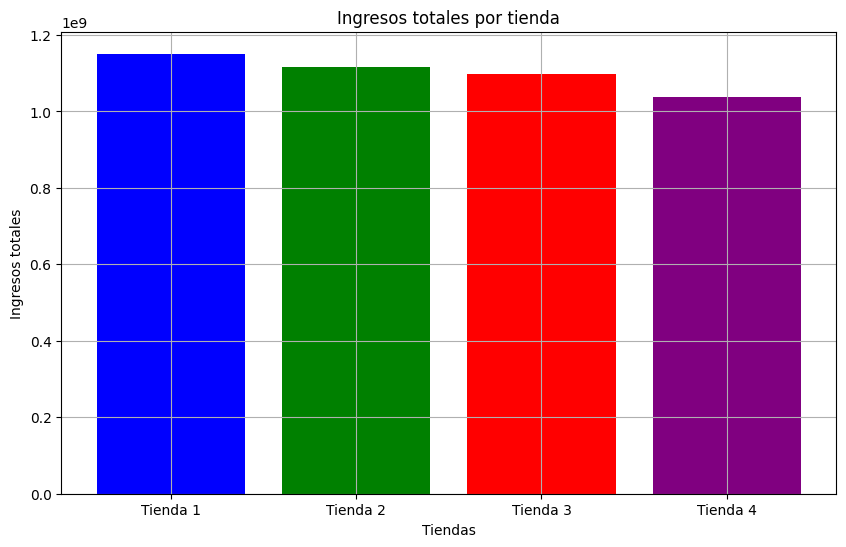

In [37]:
# Gráfico 1: Ingresos totales por tienda (Gráfico de barras)
plt.figure(figsize=(10, 6))
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
plt.bar(tiendas, ingresos, color=['blue', 'green', 'red', 'purple'])
plt.title('Ingresos totales por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos totales')
plt.grid(True)
plt.show()

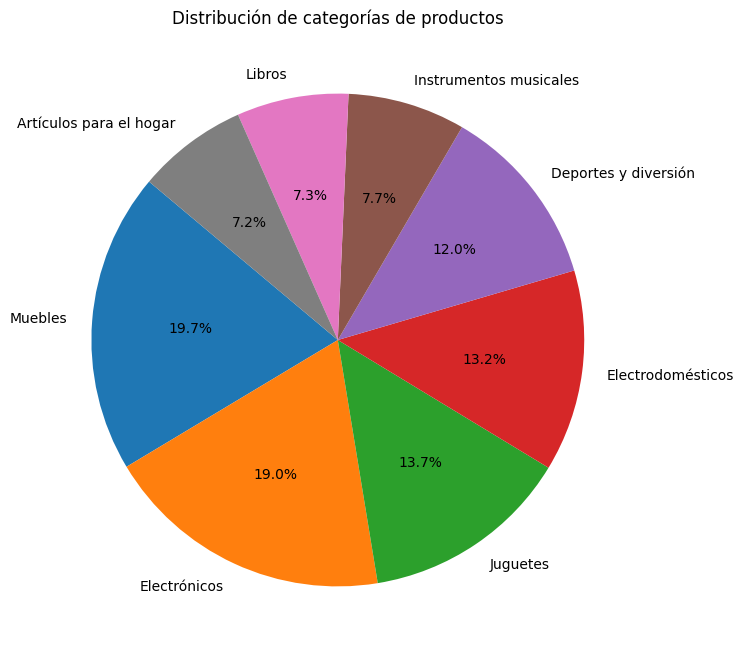

In [39]:
# Gráfico 2: Distribución de categorías de productos (Gráfico de pastel)
plt.figure(figsize=(8, 8))
categorias = tienda1['Categoría del Producto'].value_counts()
plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de categorías de productos')
plt.show()

In [ ]:
### Análisis de ingresos totales
# Calcular el ingreso total de cada tienda
ingreso_tienda1 = tienda1['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

print("\nIngresos totales por tienda:")
print(f"Tienda 1: {ingreso_tienda1}")
print(f"Tienda 2: {ingreso_tienda2}")
print(f"Tienda 3: {ingreso_tienda3}")
print(f"Tienda 4: {ingreso_tienda4}")


Ingresos totales por tienda:
Tienda 1: 1150880400.0
Tienda 2: 1116343500.0
Tienda 3: 1098019600.0
Tienda 4: 1038375700.0


In [ ]:
### Análisis de ingresos totales
# Calcular el ingreso total de cada tienda
ingreso_tienda1 = tienda1['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

print("\nIngresos totales por tienda:")
print(f"Tienda 1: {ingreso_tienda1}")
print(f"Tienda 2: {ingreso_tienda2}")
print(f"Tienda 3: {ingreso_tienda3}")
print(f"Tienda 4: {ingreso_tienda4}")


Ingresos totales por tienda:
Tienda 1: 1150880400.0
Tienda 2: 1116343500.0
Tienda 3: 1098019600.0
Tienda 4: 1038375700.0


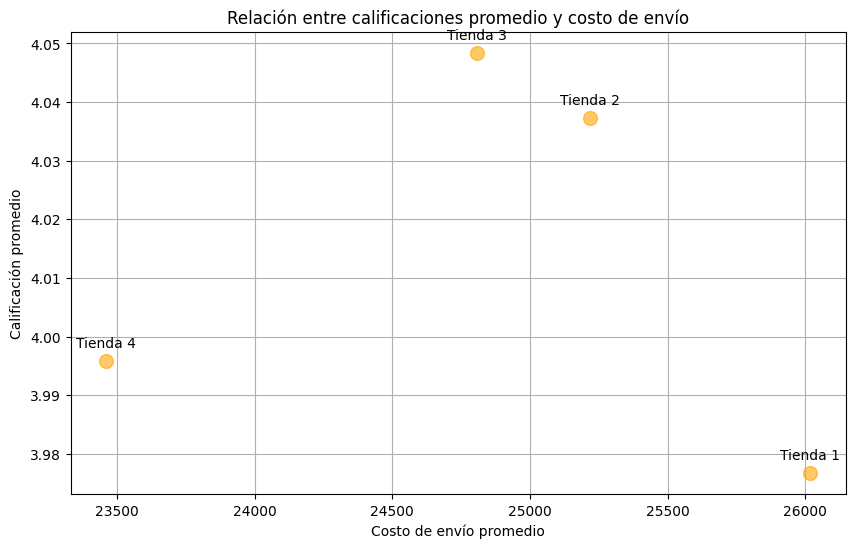

In [40]:
# Gráfico 3: Calificaciones promedio vs Costo de envío promedio (Gráfico de dispersión)
plt.figure(figsize=(10, 6))
calificaciones = [calificacion_tienda1, calificacion_tienda2, calificacion_tienda3, calificacion_tienda4]
envios = [envio_promedio_tienda1, envio_promedio_tienda2, envio_promedio_tienda3, envio_promedio_tienda4]
plt.scatter(envios, calificaciones, s=100, c='orange', alpha=0.6)
for i, txt in enumerate(tiendas):
    plt.annotate(txt, (envios[i], calificaciones[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Relación entre calificaciones promedio y costo de envío')
plt.xlabel('Costo de envío promedio')
plt.ylabel('Calificación promedio')
plt.grid(True)
plt.show()

In [41]:
### Análisis de ingresos totales
# Calcular el ingreso total de cada tienda
ingreso_tienda1 = tienda1['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

print("\nIngresos totales por tienda:")
print(f"Tienda 1: {ingreso_tienda1}")
print(f"Tienda 2: {ingreso_tienda2}")
print(f"Tienda 3: {ingreso_tienda3}")
print(f"Tienda 4: {ingreso_tienda4}")


Ingresos totales por tienda:
Tienda 1: 1150880400.0
Tienda 2: 1116343500.0
Tienda 3: 1098019600.0
Tienda 4: 1038375700.0


In [43]:
#### Análisis de productos por categoría
# Calcular cantidad de productos vendidos por categoría en cada tienda
productos_tienda1 = tienda1.groupby('Categoría del Producto').size()
productos_tienda2 = tienda2.groupby('Categoría del Producto').size()
productos_tienda3 = tienda3.groupby('Categoría del Producto').size()
productos_tienda4 = tienda4.groupby('Categoría del Producto').size()

print("\nProductos vendidos por categoría en Tienda 1:")
print(productos_tienda1)
print("\nProductos vendidos por categoría en Tienda 2:")
print(productos_tienda2)
print("\nProductos vendidos por categoría en Tienda 3:")
print(productos_tienda3)
print("\nProductos vendidos por categoría en Tienda 4:")
print(productos_tienda4)


Productos vendidos por categoría en Tienda 1:
Categoría del Producto
Artículos para el hogar    171
Deportes y diversión       284
Electrodomésticos          312
Electrónicos               448
Instrumentos musicales     182
Juguetes                   324
Libros                     173
Muebles                    465
dtype: int64

Productos vendidos por categoría en Tienda 2:
Categoría del Producto
Artículos para el hogar    181
Deportes y diversión       275
Electrodomésticos          305
Electrónicos               422
Instrumentos musicales     224
Juguetes                   313
Libros                     197
Muebles                    442
dtype: int64

Productos vendidos por categoría en Tienda 3:
Categoría del Producto
Artículos para el hogar    177
Deportes y diversión       277
Electrodomésticos          278
Electrónicos               451
Instrumentos musicales     177
Juguetes                   315
Libros                     185
Muebles                    499
dtype: int64

Produc

In [44]:
### Análisis de calificaciones
# Calcular calificaciones promedio de los clientes para cada tienda
calificacion_tienda1 = tienda1['Calificación'].mean()
calificacion_tienda2 = tienda2['Calificación'].mean()
calificacion_tienda3 = tienda3['Calificación'].mean()
calificacion_tienda4 = tienda4['Calificación'].mean()

print("\nCalificaciones promedio por tienda:")
print(f"Tienda 1: {calificacion_tienda1}")
print(f"Tienda 2: {calificacion_tienda2}")
print(f"Tienda 3: {calificacion_tienda3}")
print(f"Tienda 4: {calificacion_tienda4}")


Calificaciones promedio por tienda:
Tienda 1: 3.976685036032217
Tienda 2: 4.037303942348453
Tienda 3: 4.048325561678677
Tienda 4: 3.9957591178965224


In [45]:
### Análisis de productos más y menos vendidos
# Identificar productos más y menos vendidos en cada tienda
# Para Tienda 1
productos_tienda1 = tienda1['Producto'].value_counts()
print("\nProductos más vendidos en Tienda 1:")
print(productos_tienda1.head())
print("\nProductos menos vendidos en Tienda 1:")
print(productos_tienda1.tail())

# Para Tienda 2
productos_tienda2 = tienda2['Producto'].value_counts()
print("\nProductos más vendidos en Tienda 2:")
print(productos_tienda2.head())
print("\nProductos menos vendidos en Tienda 2:")
print(productos_tienda2.tail())

# Para Tienda 3
productos_tienda3 = tienda3['Producto'].value_counts()
print("\nProductos más vendidos en Tienda 3:")
print(productos_tienda3.head())
print("\nProductos menos vendidos en Tienda 3:")
print(productos_tienda3.tail())

# Para Tienda 4
productos_tienda4 = tienda4['Producto'].value_counts()
print("\nProductos más vendidos en Tienda 4:")
print(productos_tienda4.head())
print("\nProductos menos vendidos en Tienda 4:")
print(productos_tienda4.tail())



Productos más vendidos en Tienda 1:
Producto
TV LED UHD 4K              60
Armario                    60
Microondas                 60
Secadora de ropa           58
Bloques de construcción    56
Name: count, dtype: int64

Productos menos vendidos en Tienda 1:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

Productos más vendidos en Tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Productos menos vendidos en Tienda 2:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

Productos más vendidos en Tienda 3:
Producto
Kit de bancas      57
Cama king          56
Mesa de comedor    56
Set de

In [46]:
### Análisis de costos de envío
# Calcular el costo de envío promedio para cada tienda
envio_promedio_tienda1 = tienda1['Costo de envío'].mean()
envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

print("\nCosto de envío promedio por tienda:")
print(f"Tienda 1: {envio_promedio_tienda1}")
print(f"Tienda 2: {envio_promedio_tienda2}")
print(f"Tienda 3: {envio_promedio_tienda3}")
print(f"Tienda 4: {envio_promedio_tienda4}")


Costo de envío promedio por tienda:
Tienda 1: 26018.60958033065
Tienda 2: 25216.235693090293
Tienda 3: 24805.680373039424
Tienda 4: 23459.457167090754
